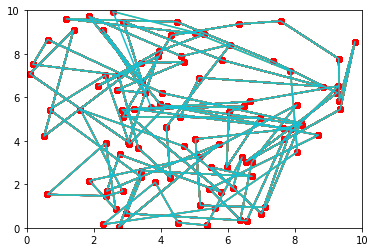

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random

x = plt.xlim(0,10)
y = plt.ylim(0,10)
xrd = 10*random.random()
yrd = 10*random.random()
xsum = [xrd]
ysum = [yrd]
pointsum = (xsum, ysum)
plt.plot(xsum,ysum,'ro')
while len(xsum) <= 100:
    xrd2 = 10*random.random()
    yrd2 = 10*random.random()
    pt1 = np.array(([xrd],[yrd]))
    pt2 = np.array(([xrd2],[yrd2]))
    dis = np.sqrt(np.sum((pt1-pt2)**2))
    if dis <= 5:
        xsum.append(xrd2)
        ysum.append(yrd2)
        plt.plot(xsum,ysum,'ro')
        plt.plot(xsum,ysum)
        xrd = xrd2
        yrd = yrd2